In [1]:
import math
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ising import energy, heat, magnetization, susceptibility  # theory

sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")
plt.style.use("seaborn-ticks")

In [2]:
def simulation_plot(filename, title, ax=None, label="data"):
    if ax == None:
        plt.gca()
    x, avg, err = np.loadtxt(filename, usecols=(0, 2, 3), unpack=True)
    ax.errorbar(x, avg, yerr=err, label=label)
    ax.title.set_text(title)
    ax.grid(True)
    ax.legend()


def get_data(directory, filename):
    directory = os.fsencode(directory)
    data = os.fsencode(filename)

    avg = np.zeros(10)
    err = np.zeros(10)
    
    D = [f for f in os.listdir(directory) if not f.startswith(b'.')] # ignore hidden files
    
    for i, file in enumerate(sorted(D)):
            
        path = os.path.join(directory, file, data)
        avg[i], err[i] = np.loadtxt(os.fsdecode(path), usecols=(2, 3), skiprows=99)

    return avg, err


def plot_data(directory, filename, title, label, ax=None):
    if ax == None:
        plt.gca()

    x = np.array([0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5, 1.7, 1.9, 2.0])
    u_avg, u_err = get_data(directory, filename)
    ax.errorbar(x, u_avg, yerr=u_err, fmt=".", label=label)
    ax.grid(True)
    ax.legend()
    ax.title.set_text(title)

# 1D Ising model with the Metroplis and Gibbs Algorithms

The one-dimensional Ising model has been solved analytically, and we can use the following curvees to check the results of our simulation.
$$
\frac{U(N,T)}{N} = 
-J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

$$
C(N,T) \underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

$$
\frac{M(N,T,h)}{N}=
\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

$$
\chi(N,T) \underset{h=0}= 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

**Algorithms**

These simulations use two different algorithms, the Metropolis alogrithm and the Gibbs algorithm. The Gibbs algorithm, also known as the heat-bath algorithm, uses a special kernel that allows for a 100% acceptance acceptance rate.

$$ T(x|y) = \frac{p(x)}{p(x)+p(y)} $$

### Theory vs Simulation

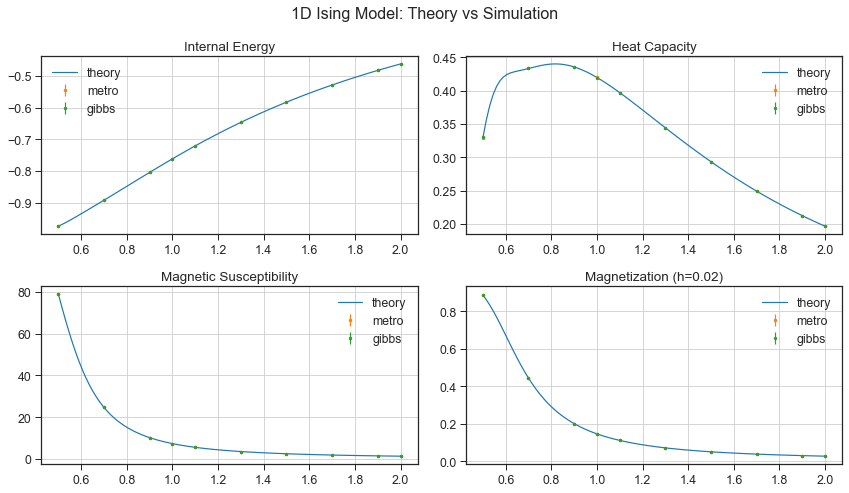

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

plt.suptitle("1D Ising Model: Theory vs Simulation")

points = 100
start = 0.5
stop = 2.0
T = np.linspace(start, stop, points)
J = 1.0
Ns = 50
h = 0.02

# Energy
e = energy(J, Ns, start, stop, points)
ax[0, 0].plot(T, e, label="theory")
plot_data("./data/metropolis/", "output.ene.0", "Internal Energy", "metro", ax[0, 0])
plot_data("./data/gibbs/", "output.ene.0", "Internal Energy", "gibbs", ax[0, 0])

# Heat capacity
hc = heat(J, Ns, start, stop, points)
ax[0, 1].plot(T, hc, label="theory")
plot_data("./data/metropolis/", "output.heat.0", "Heat Capacity", "metro", ax[0, 1])
plot_data("./data/gibbs/", "output.heat.0", "Heat Capacity", "gibbs", ax[0, 1])

# Susceptibility
X = susceptibility(J, Ns, start, stop, points)
ax[1, 0].plot(T, X, label="theory")
plot_data("./data/metropolis/", "output.chi.0", "Magnetic Susceptibility", "metro", ax[1, 0])
plot_data("./data/gibbs/", "output.chi.0", "Magnetic Susceptibility", "gibbs", ax[1, 0])


# Magnetization
M = magnetization(h, J, Ns, start, stop, points)
ax[1, 1].plot(T, M, label="theory")
plot_data("./data/metropolis/", "output.mag.0", "Magnetization (h=0.02)", "metro", ax[1, 1])
plot_data("./data/gibbs/", "output.mag.0", "Magnetization (h=0.02)", "gibbs", ax[1, 1])

plt.tight_layout()
plt.legend()
plt.show()

**Figure: Observables of 1D Ising model, theory compared with simulations. Startling compatibility.** 

### Blocking Method: Internal Energy

- 100 blocks
- 1000 steps per block

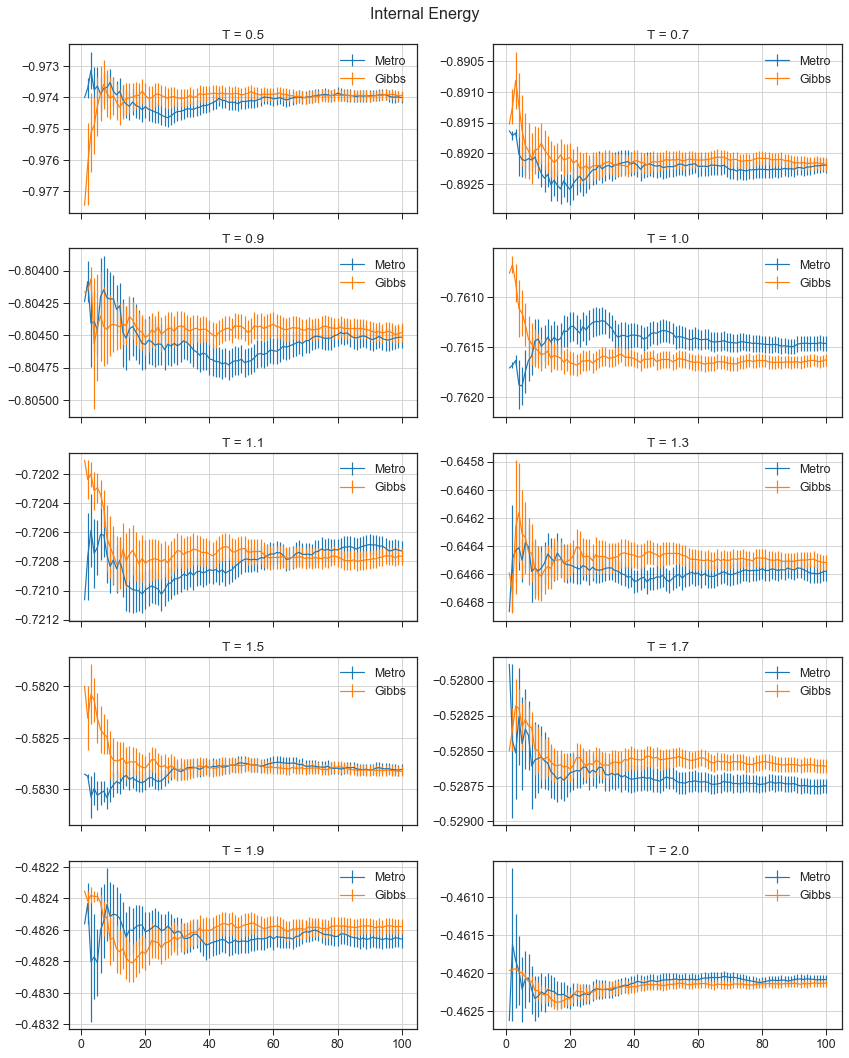

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=5, sharex=True, figsize=(12, 15))

fig.suptitle("Internal Energy")

simulation_plot("data/metropolis/0.5/output.ene.0", "T = 0.5", axes[0, 0], label="Metro")
simulation_plot("data/metropolis/0.7/output.ene.0", "T = 0.7", axes[0, 1], label="Metro")
simulation_plot("data/metropolis/0.9/output.ene.0", "T = 0.9", axes[1, 0], label="Metro")
simulation_plot("data/metropolis/1.0/output.ene.0", "T = 1.0", axes[1, 1], label="Metro")
simulation_plot("data/metropolis/1.1/output.ene.0", "T = 1.1", axes[2, 0], label="Metro")
simulation_plot("data/metropolis/1.3/output.ene.0", "T = 1.3", axes[2, 1], label="Metro")
simulation_plot("data/metropolis/1.5/output.ene.0", "T = 1.5", axes[3, 0], label="Metro")
simulation_plot("data/metropolis/1.7/output.ene.0", "T = 1.7", axes[3, 1], label="Metro")
simulation_plot("data/metropolis/1.9/output.ene.0", "T = 1.9", axes[4, 0], label="Metro")
simulation_plot("data/metropolis/2.0/output.ene.0", "T = 2.0", axes[4, 1], label="Metro")

simulation_plot("data/gibbs/0.5/output.ene.0", "T = 0.5", axes[0, 0], label="Gibbs")
simulation_plot("data/gibbs/0.7/output.ene.0", "T = 0.7", axes[0, 1], label="Gibbs")
simulation_plot("data/gibbs/0.9/output.ene.0", "T = 0.9", axes[1, 0], label="Gibbs")
simulation_plot("data/gibbs/1.0/output.ene.0", "T = 1.0", axes[1, 1], label="Gibbs")
simulation_plot("data/gibbs/1.1/output.ene.0", "T = 1.1", axes[2, 0], label="Gibbs")
simulation_plot("data/gibbs/1.3/output.ene.0", "T = 1.3", axes[2, 1], label="Gibbs")
simulation_plot("data/gibbs/1.5/output.ene.0", "T = 1.5", axes[3, 0], label="Gibbs")
simulation_plot("data/gibbs/1.7/output.ene.0", "T = 1.7", axes[3, 1], label="Gibbs")
simulation_plot("data/gibbs/1.9/output.ene.0", "T = 1.9", axes[4, 0], label="Gibbs")
simulation_plot("data/gibbs/2.0/output.ene.0", "T = 2.0", axes[4, 1], label="Gibbs")

plt.tight_layout()

**Figure: Blocked average of internal energy of Ising model with Gibbs and Metropolis algorithm. The two coincide.**

### Blocking Method: Heat Capacity

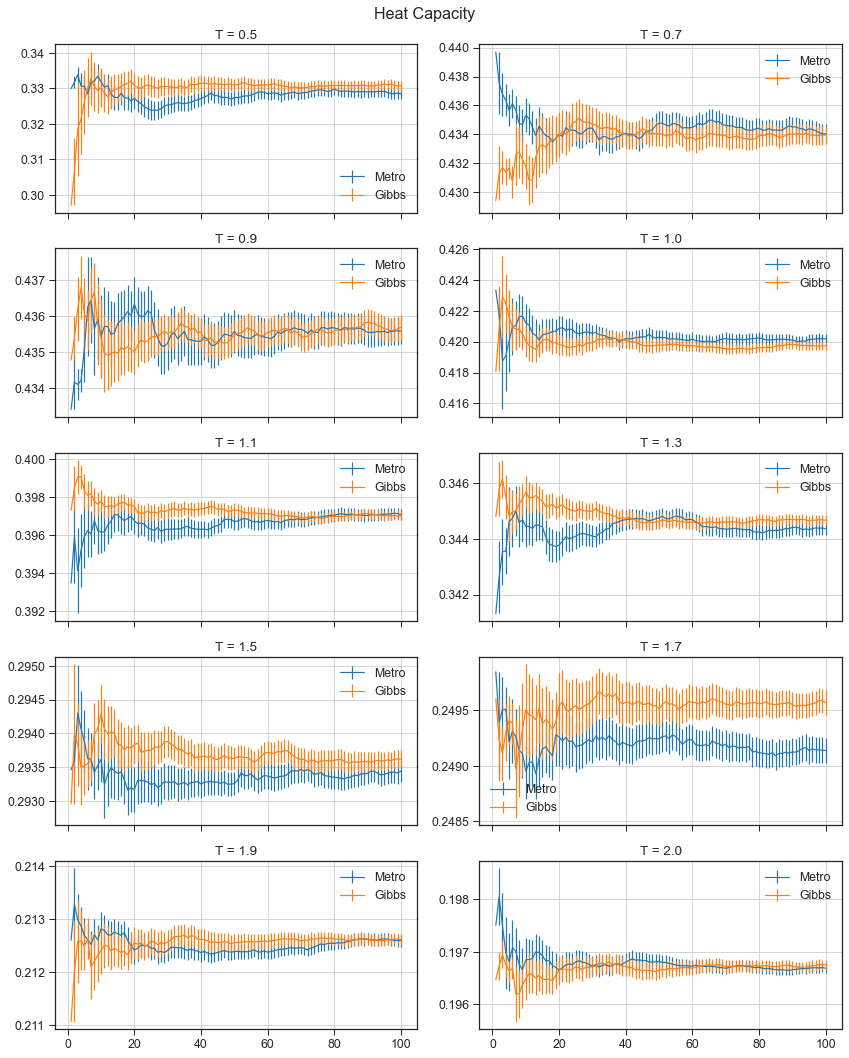

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=5, sharex=True, figsize=(12, 15))

plt.suptitle("Heat Capacity")

simulation_plot("data/metropolis/0.5/output.heat.0", "T = 0.5", axes[0, 0], label="Metro")
simulation_plot("data/metropolis/0.7/output.heat.0", "T = 0.7", axes[0, 1], label="Metro")
simulation_plot("data/metropolis/0.9/output.heat.0", "T = 0.9", axes[1, 0], label="Metro")
simulation_plot("data/metropolis/1.0/output.heat.0", "T = 1.0", axes[1, 1], label="Metro")
simulation_plot("data/metropolis/1.1/output.heat.0", "T = 1.1", axes[2, 0], label="Metro")
simulation_plot("data/metropolis/1.3/output.heat.0", "T = 1.3", axes[2, 1], label="Metro")
simulation_plot("data/metropolis/1.5/output.heat.0", "T = 1.5", axes[3, 0], label="Metro")
simulation_plot("data/metropolis/1.7/output.heat.0", "T = 1.7", axes[3, 1], label="Metro")
simulation_plot("data/metropolis/1.9/output.heat.0", "T = 1.9", axes[4, 0], label="Metro")
simulation_plot("data/metropolis/2.0/output.heat.0", "T = 2.0", axes[4, 1], label="Metro")

simulation_plot("data/gibbs/0.5/output.heat.0", "T = 0.5", axes[0, 0], label="Gibbs")
simulation_plot("data/gibbs/0.7/output.heat.0", "T = 0.7", axes[0, 1], label="Gibbs")
simulation_plot("data/gibbs/0.9/output.heat.0", "T = 0.9", axes[1, 0], label="Gibbs")
simulation_plot("data/gibbs/1.0/output.heat.0", "T = 1.0", axes[1, 1], label="Gibbs")
simulation_plot("data/gibbs/1.1/output.heat.0", "T = 1.1", axes[2, 0], label="Gibbs")
simulation_plot("data/gibbs/1.3/output.heat.0", "T = 1.3", axes[2, 1], label="Gibbs")
simulation_plot("data/gibbs/1.5/output.heat.0", "T = 1.5", axes[3, 0], label="Gibbs")
simulation_plot("data/gibbs/1.7/output.heat.0", "T = 1.7", axes[3, 1], label="Gibbs")
simulation_plot("data/gibbs/1.9/output.heat.0", "T = 1.9", axes[4, 0], label="Gibbs")
simulation_plot("data/gibbs/2.0/output.heat.0", "T = 2.0", axes[4, 1], label="Gibbs")
plt.tight_layout()

**Figure: Blocked average of heat capacity of Ising model with Gibbs and Metropolis algorithm.**

### Blocking Method: Magnetic Susceptibility

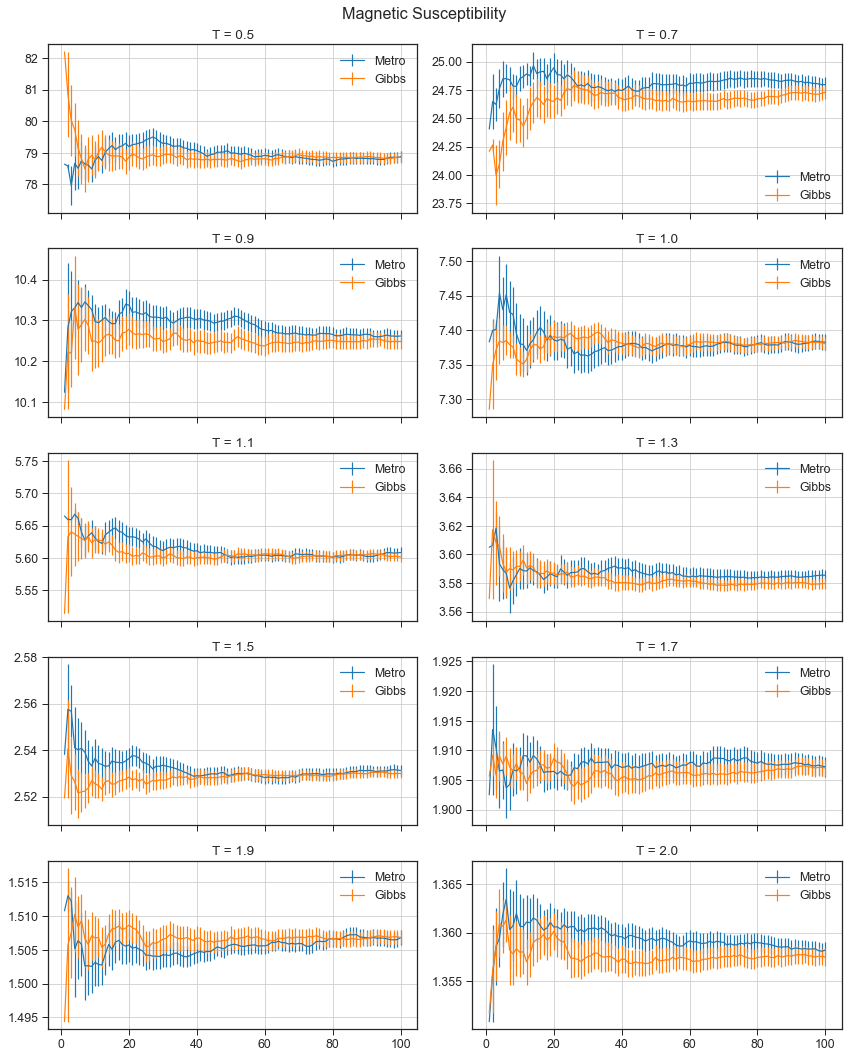

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=5, sharex=True, figsize=(12, 15))

plt.suptitle("Magnetic Susceptibility")

simulation_plot("data/metropolis/0.5/output.chi.0", "T = 0.5", axes[0, 0], label="Metro")
simulation_plot("data/metropolis/0.7/output.chi.0", "T = 0.7", axes[0, 1], label="Metro")
simulation_plot("data/metropolis/0.9/output.chi.0", "T = 0.9", axes[1, 0], label="Metro")
simulation_plot("data/metropolis/1.0/output.chi.0", "T = 1.0", axes[1, 1], label="Metro")
simulation_plot("data/metropolis/1.1/output.chi.0", "T = 1.1", axes[2, 0], label="Metro")
simulation_plot("data/metropolis/1.3/output.chi.0", "T = 1.3", axes[2, 1], label="Metro")
simulation_plot("data/metropolis/1.5/output.chi.0", "T = 1.5", axes[3, 0], label="Metro")
simulation_plot("data/metropolis/1.7/output.chi.0", "T = 1.7", axes[3, 1], label="Metro")
simulation_plot("data/metropolis/1.9/output.chi.0", "T = 1.9", axes[4, 0], label="Metro")
simulation_plot("data/metropolis/2.0/output.chi.0", "T = 2.0", axes[4, 1], label="Metro")

simulation_plot("data/gibbs/0.5/output.chi.0", "T = 0.5", axes[0, 0], label="Gibbs")
simulation_plot("data/gibbs/0.7/output.chi.0", "T = 0.7", axes[0, 1], label="Gibbs")
simulation_plot("data/gibbs/0.9/output.chi.0", "T = 0.9", axes[1, 0], label="Gibbs")
simulation_plot("data/gibbs/1.0/output.chi.0", "T = 1.0", axes[1, 1], label="Gibbs")
simulation_plot("data/gibbs/1.1/output.chi.0", "T = 1.1", axes[2, 0], label="Gibbs")
simulation_plot("data/gibbs/1.3/output.chi.0", "T = 1.3", axes[2, 1], label="Gibbs")
simulation_plot("data/gibbs/1.5/output.chi.0", "T = 1.5", axes[3, 0], label="Gibbs")
simulation_plot("data/gibbs/1.7/output.chi.0", "T = 1.7", axes[3, 1], label="Gibbs")
simulation_plot("data/gibbs/1.9/output.chi.0", "T = 1.9", axes[4, 0], label="Gibbs")
simulation_plot("data/gibbs/2.0/output.chi.0", "T = 2.0", axes[4, 1], label="Gibbs")
plt.tight_layout()

**Figure: Blocked average of magnetic susceptibility of Ising model with Gibbs and Metropolis algorithm**

### Blocking Method: Magnetization

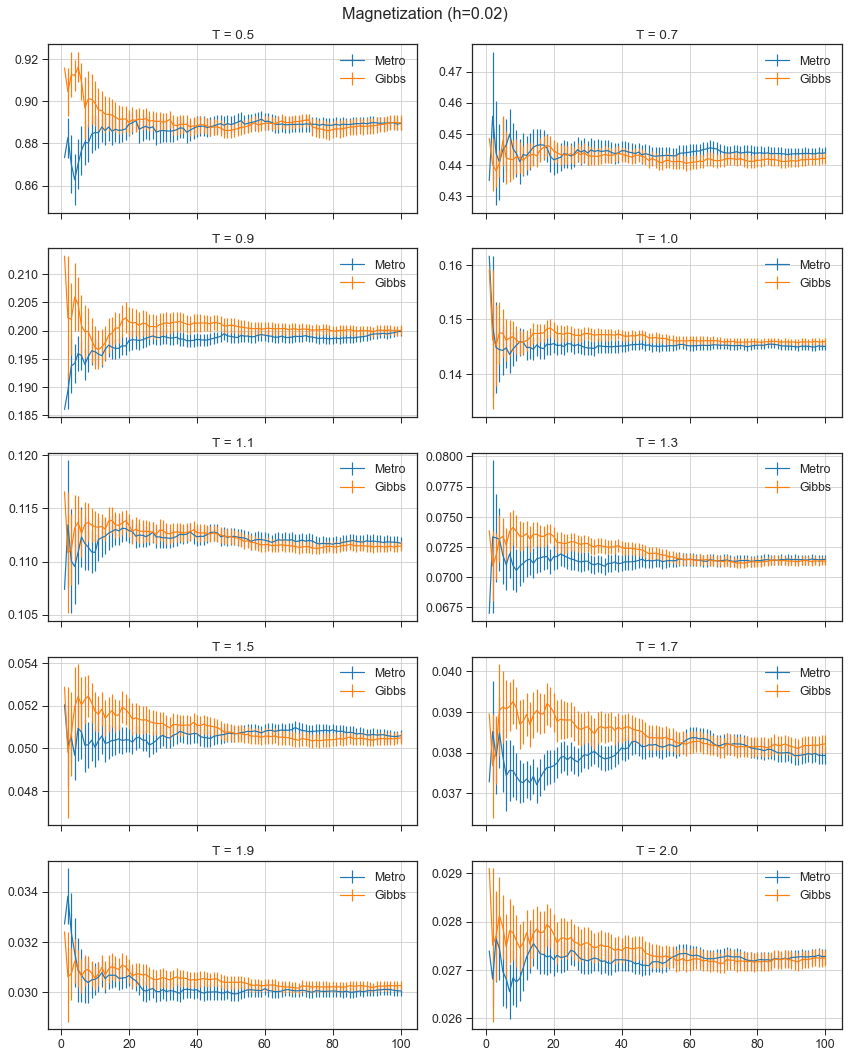

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=5, sharex=True, figsize=(12, 15))


plt.suptitle("Magnetization (h=0.02)")

simulation_plot("data/metropolis/0.5/output.mag.0", "T = 0.5", axes[0, 0], label="Metro")
simulation_plot("data/metropolis/0.7/output.mag.0", "T = 0.7", axes[0, 1], label="Metro")
simulation_plot("data/metropolis/0.9/output.mag.0", "T = 0.9", axes[1, 0], label="Metro")
simulation_plot("data/metropolis/1.0/output.mag.0", "T = 1.0", axes[1, 1], label="Metro")
simulation_plot("data/metropolis/1.1/output.mag.0", "T = 1.1", axes[2, 0], label="Metro")
simulation_plot("data/metropolis/1.3/output.mag.0", "T = 1.3", axes[2, 1], label="Metro")
simulation_plot("data/metropolis/1.5/output.mag.0", "T = 1.5", axes[3, 0], label="Metro")
simulation_plot("data/metropolis/1.7/output.mag.0", "T = 1.7", axes[3, 1], label="Metro")
simulation_plot("data/metropolis/1.9/output.mag.0", "T = 1.9", axes[4, 0], label="Metro")
simulation_plot("data/metropolis/2.0/output.mag.0", "T = 2.0", axes[4, 1], label="Metro")

simulation_plot("data/gibbs/0.5/output.mag.0", "T = 0.5", axes[0, 0], label="Gibbs")
simulation_plot("data/gibbs/0.7/output.mag.0", "T = 0.7", axes[0, 1], label="Gibbs")
simulation_plot("data/gibbs/0.9/output.mag.0", "T = 0.9", axes[1, 0], label="Gibbs")
simulation_plot("data/gibbs/1.0/output.mag.0", "T = 1.0", axes[1, 1], label="Gibbs")
simulation_plot("data/gibbs/1.1/output.mag.0", "T = 1.1", axes[2, 0], label="Gibbs")
simulation_plot("data/gibbs/1.3/output.mag.0", "T = 1.3", axes[2, 1], label="Gibbs")
simulation_plot("data/gibbs/1.5/output.mag.0", "T = 1.5", axes[3, 0], label="Gibbs")
simulation_plot("data/gibbs/1.7/output.mag.0", "T = 1.7", axes[3, 1], label="Gibbs")
simulation_plot("data/gibbs/1.9/output.mag.0", "T = 1.9", axes[4, 0], label="Gibbs")
simulation_plot("data/gibbs/2.0/output.mag.0", "T = 2.0", axes[4, 1], label="Gibbs")
plt.tight_layout()

**Figure: Blocked average of magnetization at h = 0.02 of Ising model with Gibbs and Metropolis algorithm**